In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/gdrive/MyDrive/data science/train (2).csv",header=None)

In [ ]:
num_cols = len(df.columns)
df.columns = ["C" + str(i) for i in range(1, num_cols+1)]

In [ ]:
df.head

<bound method NDFrame.head of             C1      C2      C3      C4    C5 C6    C7      C8  C9  C10  ...  \
0        69769    -946  0.1613  0.7960  Panl  N  Bus2  0.0742   0    2  ...   
1       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
3        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
4        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246003  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246006  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246007    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        C113  C114   

In [ ]:
df.shape

(246008, 122)

In [ ]:
df.info

<bound method DataFrame.info of             C1      C2      C3      C4    C5 C6    C7      C8  C9  C10  ...  \
0        69769    -946  0.1613  0.7960  Panl  N  Bus2  0.0742   0    2  ...   
1       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
3        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
4        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246003  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246006  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246007    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        C113  C114 

In [ ]:
df.dtypes

C1        int64
C2        int64
C3      float64
C4      float64
C5       object
         ...   
C118     object
C119    float64
C120    float64
C121      int64
C122      int64
Length: 122, dtype: object

In [ ]:
df.isnull().sum()

C1           0
C2           0
C3      143829
C4      163543
C5      124975
         ...  
C118         0
C119       811
C120    122297
C121         0
C122         0
Length: 122, dtype: int64

In [ ]:
NaColumn = df.columns[df.isnull().mean()>=0.10]
df1= df.drop(NaColumn, axis=1)

In [ ]:
dtypes = df.dtypes

continuous = []
binary = []
categorical = []
label = []

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)


binary.remove("C122")
label.append("C122")

In [ ]:
object_columns = df1.select_dtypes(include=['object']).columns

for col in object_columns:
    unique_values = df1[col].value_counts()
    print(f"{col}---{len(unique_values)}")

In [ ]:
for column in df.columns:

    unique_values = df[column].unique()
    if len(unique_values) == 2:
        binary = {unique_values[0]: 0, unique_values[1]: 1}
        df[column] = df[column].replace(binary)
  
###2 kategori içeren object tipindeki sütunlardaki kategorileri binary hale getirdik for döngüsü yardımıyla aşağıda da A1 ve A6 sütununu çalıştırarak kontrol ettik 
### 236977 ID'li kişinin A6 sütununda karşısında Y yazıyordu ve bunu 1'e çevirmiş yani for döngümüz çalışmış  
print(df[['C1', 'C6']].head())

       C1  C6
0   69769   0
1  236977   1
2  168821   0
3   94708   0
4   84556   0


In [ ]:
column_cat = df1.select_dtypes(include='object').columns
print(column_cat)

Int64Index([6, 16, 30, 31, 67, 69, 93, 117], dtype='int64')


In [ ]:
df1.columns[df1.isnull().sum() > 0]

Index([], dtype='object')

In [ ]:
df1[df1.columns[df1.isnull().sum() > 0]].dtypes

Series([], dtype: object)

In [ ]:
most_C122=df1['C122'].mode()[0]
df1['C122']= df1['C122'].fillna(most_C122)
df1[df1.columns[df1.isnull().sum() > 0]].dtypes

NameError: ignored

In [ ]:
df1.fillna(df1.median(), inplace=True)

In [ ]:
df1.isnull().sum()

0           0
1           0
5           0
8           0
9           0
           ..
117_Mard    0
117_Sepd    0
117_Sind    0
117_Unkn    0
117_Widw    0
Length: 144, dtype: int64

In [ ]:
df1 = pd.get_dummies(df1, columns=column_cat)
df1.head

KeyError: ignored

In [ ]:
df1.dtypes
df1.isnull().sum()

0           0
1           0
5           0
8           0
9           0
           ..
117_Mard    0
117_Sepd    0
117_Sind    0
117_Unkn    0
117_Widw    0
Length: 144, dtype: int64

In [ ]:
df1.dtypes

0           int64
1           int64
5           int64
8           int64
9           int64
            ...  
117_Mard    uint8
117_Sepd    uint8
117_Sind    uint8
117_Unkn    uint8
117_Widw    uint8
Length: 144, dtype: object

In [ ]:
num_missing = df1.isnull().sum()

num_cols_with_missing = (num_missing > 0).sum()

print("Number of columns with missing values:", num_cols_with_missing)

Number of columns with missing values: 0


In [ ]:
corr_matrix=df1.corr()

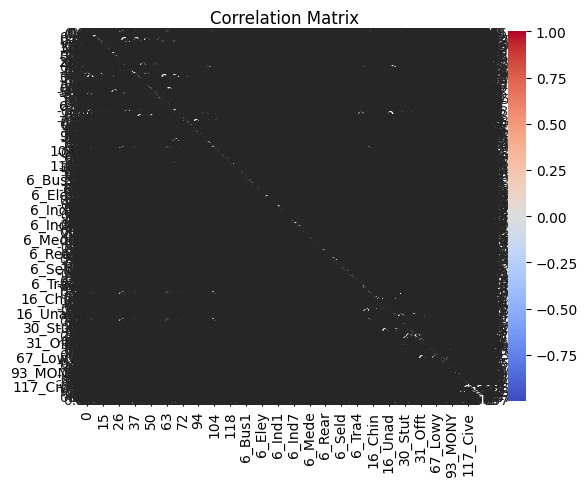

In [ ]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
columns_to_drop = [col for col in high_corr.columns if any(high_corr[col] > 0.9)]
df1 = df1.drop(columns=columns_to_drop)

In [ ]:
df1.shape

(246008, 144)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['C122'],axis=1)
y = df['C122']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [ ]:
df.C122.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: C122, dtype: float64

In [ ]:
y_train = y.value_counts(normalize=True)

y_train.value_counts(normalize=True)

0.919271    0.5
0.080729    0.5
Name: C122, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify =df.C122)

In [ ]:
y_train.value_counts(normalize = True)

0    0.919271
1    0.080729
Name: C122, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

ValueError: ignored

In [ ]:
y_pred = lr.predict(x_test)

ValueError: ignored

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ValueError: ignored

In [ ]:
x_train_scaled

NameError: ignored

In [ ]:
lr = LogisticRegression(max_iter = 1000, solver = "lbfgs")

In [ ]:
lr.fit(x_train_scaled, y_train)

NameError: ignored

In [ ]:
y_pred = lr.predict(x_test_scaled)

NameError: ignored

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
rf.fir(x_train, y_train)

AttributeError: ignored

In [ ]:
y_pred = rf.predict(x_text)

NameError: ignored

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: ignored